In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from f01_preprocess_datasets import datasets

In [2]:
# Función Exponencial
def objective_function(x, a, b, c):
    return a*x**(-b) + c

def get_best_dim(m, a, b, c):
    # dy/dx = abx^(b-1) = m -> x = (m/ab)^(1-b)
    return (-a*b/m)**(1/(b+1))

def fit_objective(data):
    # Pares de datos originales
    x = np.array(data['dims'])
    y = np.average(data.loc[:,'loss1':], axis = 1)
    plt.scatter(x, y, alpha=0.7)
    
    # Curva de ajuste
    params,_ = curve_fit(objective_function, x, y)
    x_line = np.arange(np.min(x), np.max(x)+0.1, 0.1)
    y_line = objective_function(x_line, *params)
    plt.plot(x_line, y_line, color='black')
    
    # Puntos inicial y final en la curva, y pendiente de la recta que los conecta
    x0 = x_line[0]
    xf = x_line[-1]
    y0 = y_line[0]
    yf = y_line[-1]
    m = (yf - y0)/(xf - x0)    
    x_dim = get_best_dim(m, *params)
    y_dim = objective_function(x_dim, *params)     
    plt.scatter(x_dim, y_dim, color='red')
    
    # Grafico
    plt.xlabel('Encoding Dimension')
    plt.ylabel('Autoencoder Loss')
    print(f'Numero de dimensiones originales: {x[-1]}')
    print(f'Parametros: (a,b,c) =  {np.round(params,3)}')
    print(f'(x0, y0) = {(np.round(x0,3), np.round(y0,3))}')
    print(f'(xf, yf) = {(np.round(xf,3), np.round(yf,3))}')
    print(f'm = (yf-y0)/(xf-x0) = {np.round(m,4)}')
    print(f'Dimension en la curva con pendiente m: {np.round(x_dim,3)}')

def loss_analisis(dataset):
    data = pd.read_csv(f'./results_autoencoders/{dataset}.csv')
    fit_objective(data)

## 0. CIC-IDS-2017

Numero de dimensiones originales: 78.0
Parametros: (a,b,c) =  [0.047 1.292 0.051]
(x0, y0) = (1.0, 0.097)
(xf, yf) = (78.0, 0.051)
m = (yf-y0)/(xf-x0) = -0.0006
Dimension en la curva con pendiente m: 7.451


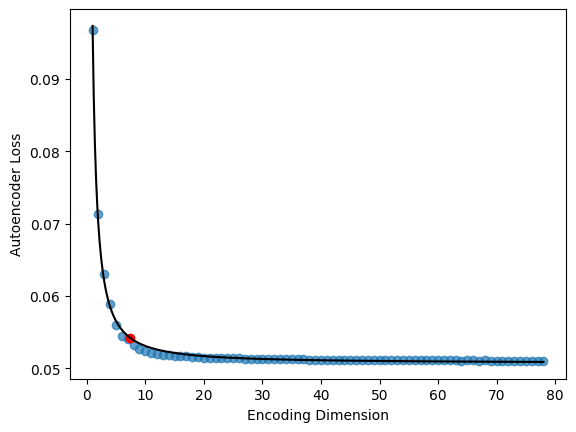

In [3]:
loss_analisis(datasets[0])

## 1. UNSW-NB15

Numero de dimensiones originales: 42.0
Parametros: (a,b,c) =  [0.034 0.724 0.12 ]
(x0, y0) = (1.0, 0.154)
(xf, yf) = (42.0, 0.122)
m = (yf-y0)/(xf-x0) = -0.0008
Dimension en la curva con pendiente m: 7.441


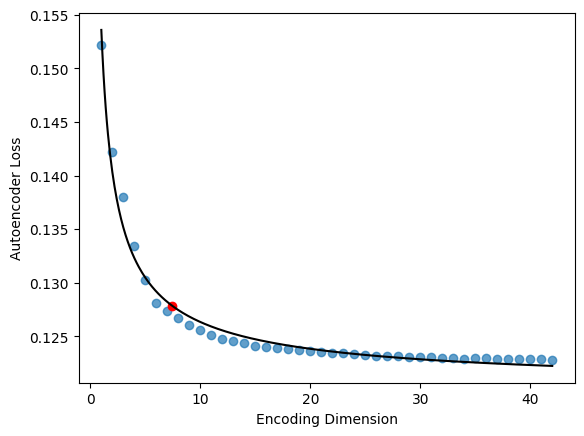

In [4]:
loss_analisis(datasets[1])

## 2. NF-UNSW-NB15-v2

Numero de dimensiones originales: 39.0
Parametros: (a,b,c) =  [0.037 1.321 0.121]
(x0, y0) = (1.0, 0.158)
(xf, yf) = (39.0, 0.121)
m = (yf-y0)/(xf-x0) = -0.001
Dimension en la curva con pendiente m: 5.422


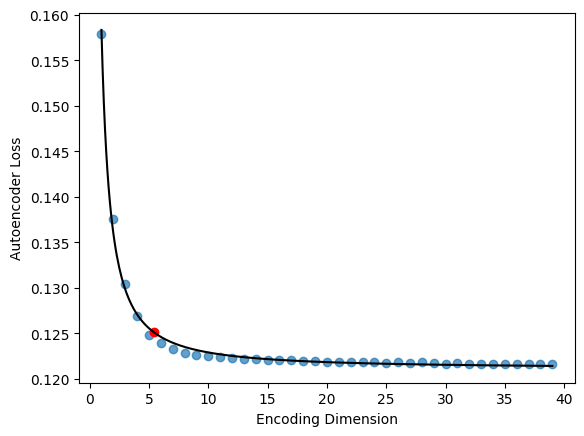

In [5]:
loss_analisis(datasets[2])

## 3. CSE-CIC-IDS2018

Numero de dimensiones originales: 77.0
Parametros: (a,b,c) =  [0.042 1.385 0.064]
(x0, y0) = (1.0, 0.106)
(xf, yf) = (77.0, 0.064)
m = (yf-y0)/(xf-x0) = -0.0005
Dimension en la curva con pendiente m: 7.052


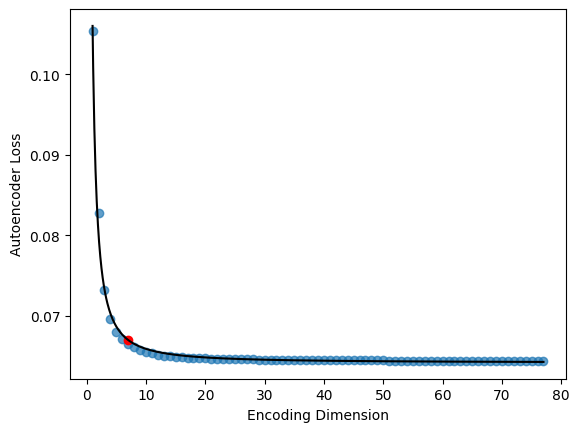

In [6]:
loss_analisis(datasets[3])

## 4. NSL-KDD

Numero de dimensiones originales: 41.0
Parametros: (a,b,c) =  [0.133 0.967 0.053]
(x0, y0) = (1.0, 0.186)
(xf, yf) = (41.0, 0.057)
m = (yf-y0)/(xf-x0) = -0.0032
Dimension en la curva con pendiente m: 6.505


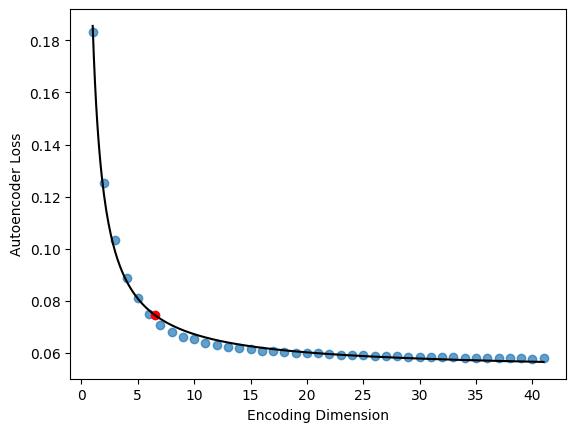

In [7]:
loss_analisis(datasets[4])

## Conclusiones

Se hallaron funciones polinomiales del tipo y = ax^(-b) + c para obtener curvas que modelen el cambio en la pérdida del autoencoder en función de la encoding dimension.

Al utilizar el teorema del punto medio sobre dichas curvas entre la dimensión inicial y final, se halló que la encoding dimension óptima de todas las curvas cae entre 5 y 7. Esto quiere decir que todos los datasets pueden ser reducidos dimensionalmente hasta una representación dimensional de 7 features, y aún así preservar la mayor parte de información de sus features originales.